In [1]:
%reload_ext autoreload
%autoreload 2
import numpy as np
import pynocular as pn

In [2]:
# Generate some test data
p = pn.PointData()
p['x'] = np.linspace(0, 1, 100)
p['y'] = np.random.rand(100)
p['a'] = p['x'] ** 2 * p['y']

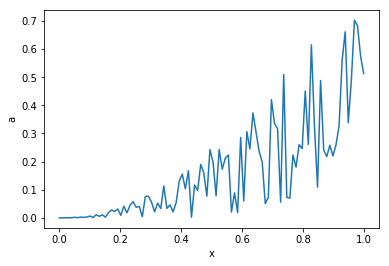

In [14]:
# let's make a simple plot
p.plot('x', 'a')

In [15]:
p2 = pn.PointData(x=np.random.rand(100))
#p2['x'] = np.random.rand(200)

In [16]:
p2

Data(OrderedDict([('x', array([0.50364882, 0.53506811, 0.59812334, 0.34370166, 0.92675568,
       0.03449819, 0.61079324, 0.12560056, 0.31286808, 0.04001287,
       0.38983161, 0.81327628, 0.14710639, 0.5293542 , 0.41147558,
       0.97173992, 0.69216512, 0.41144509, 0.56471853, 0.40660735,
       0.2428876 , 0.31503348, 0.90761801, 0.94554244, 0.40837605,
       0.06975975, 0.00299768, 0.28007687, 0.92150719, 0.99845286,
       0.62839177, 0.82871974, 0.14802503, 0.42017185, 0.25048846,
       0.61775293, 0.27332665, 0.97852605, 0.40637557, 0.83817536,
       0.74646134, 0.56968738, 0.22097777, 0.61740226, 0.18903955,
       0.13615692, 0.41975367, 0.67752812, 0.50155836, 0.52421843,
       0.44493286, 0.37488506, 0.1794553 , 0.56389394, 0.32851505,
       0.17701437, 0.02817345, 0.83635237, 0.95793206, 0.83890493,
       0.97486952, 0.04429752, 0.67020596, 0.69370949, 0.86324727,
       0.67731235, 0.91571862, 0.30885756, 0.81599338, 0.28028985,
       0.73646044, 0.37530335, 0.42458

In [17]:
#p2.plot()
#p2['a'] = p.interpolate('a', method='linear')#(p2).plot('x', 'a', '.')
p2 = p.interpolate('a', method='linear')(pn.PointData(x=np.random.rand(100)))#.plot('x', 'a', '.')

Automatic interpolation with respect to x


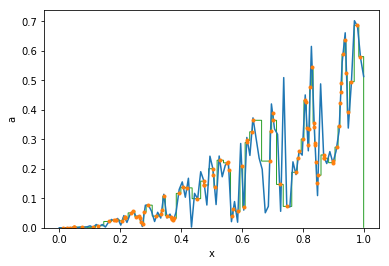

In [18]:
p.plot('x', 'a')
p2.plot('.')
p2.interpolate('a', method='nearest')(x=np.linspace(0,1,1000)).plot()

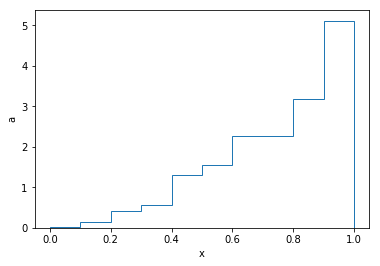

In [19]:
# Generate a histogram function for histograms with weight 'a'
f = p.histogram('a')

# we can evaluate the function on, say 'x', which returns a new object
g = f('x')

# let's plot the result
g.plot()

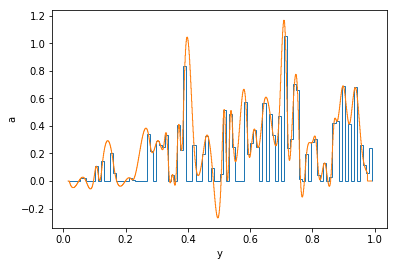

In [21]:
p.histogram('a')(y=100).plot()
p.binned('a', function=np.sum, fill_value=np.nan)(y=100).interpolate('a', method='cubic')(y=1000).plot()

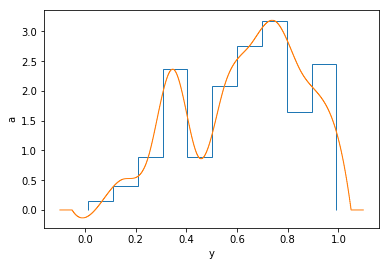

In [22]:
p.histogram('a')('y').plot()
p.binned('a')(y=np.linspace(-0.1,1.1,13)).interpolate('a', method='cubic')(y=1000).plot()

In [23]:
p.histogram('a')(x=10).grid

Grid(
Dimension("x",
points = None,
edges = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
nbins = 10),)

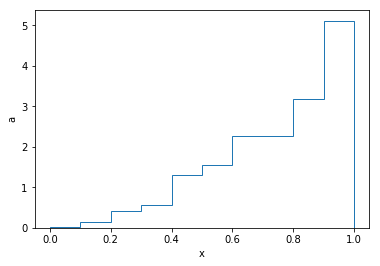

In [24]:
# or in one line
p.histogram('a')('x').plot()

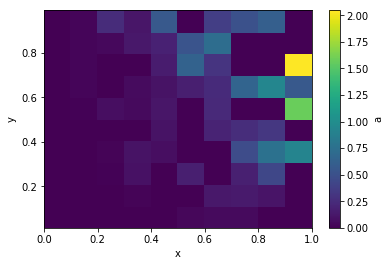

In [25]:
# we can also evaluate the histogram in different dimensions
p.histogram('a')('x', 'y').plot(cbar=True)

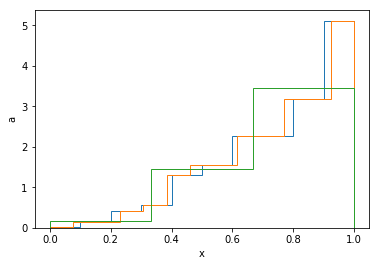

In [26]:


# we can also evaluate the histogram in different dimensions
g = p.histogram('a')('x').plot()
g = p.histogram('a')('x').resample('a')(x=13).plot()
g = p.histogram('a')('x').resample('a')(x=3).plot()


In [27]:
f = p.histogram('a')('x').resample('a')

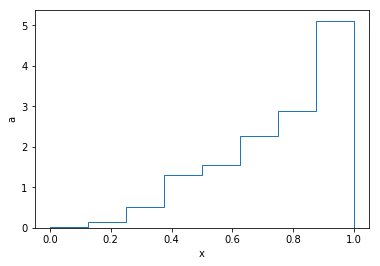

In [28]:
f(f(x=8)).plot()

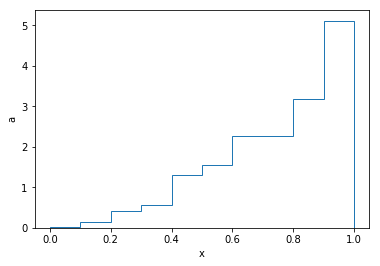

In [29]:
# or the function from before in a different binnig
f(x=30).plot()

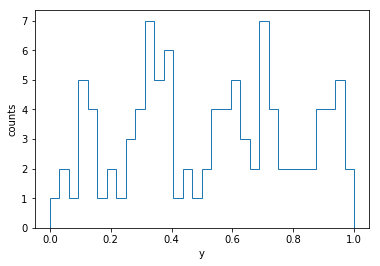

In [30]:
# a histogram with no weights, evaluated in y
p.histogram()(y=np.linspace(0,1,33)).plot()

In [31]:
# the returned object is a GridData type
g = p.histogram('a')(x=20)

In [32]:
# it has a grid defined
g.grid

Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]))
nbins = 20),)

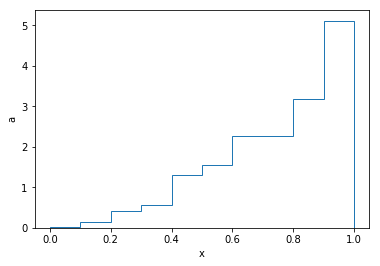

In [33]:
# this evaluates the function from earlier on g
f(g).plot()

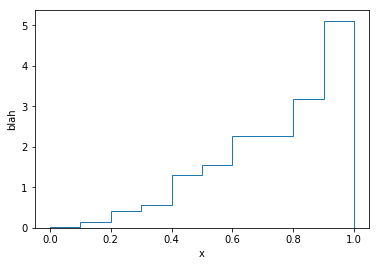

In [34]:
# or assign it a new variable which will automatically evaluate (looks a bit abstract)
g['blah'] = f
g.plot('blah')

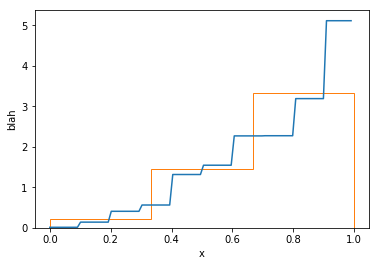

In [35]:
g.lookup('blah')(p).plot('x', 'blah')#'x', 'blah')
g.resample('blah')(x=3).plot()#'x', 'blah')

In [36]:
#p['blah'] = 

p2 = g.lookup('blah')(p)

In [37]:
p2 = pn.PointData()
p2['x'] = np.linspace(0,1,33)

In [38]:
p2['blah'] = g.lookup('blah')

In [39]:
p2['f'] = g.lookup('blah')

In [40]:
p2

Data(OrderedDict([('x', array([0.     , 0.03125, 0.0625 , 0.09375, 0.125  , 0.15625, 0.1875 ,
       0.21875, 0.25   , 0.28125, 0.3125 , 0.34375, 0.375  , 0.40625,
       0.4375 , 0.46875, 0.5    , 0.53125, 0.5625 , 0.59375, 0.625  ,
       0.65625, 0.6875 , 0.71875, 0.75   , 0.78125, 0.8125 , 0.84375,
       0.875  , 0.90625, 0.9375 , 0.96875, 1.     ])), ('blah', array([0.01253112, 0.01253112, 0.01253112, 0.01253112, 0.13977669,
       0.13977669, 0.13977669, 0.40722306, 0.40722306, 0.40722306,
       0.56231797, 0.56231797, 0.56231797, 1.31509279, 1.31509279,
       1.31509279, 1.54429775, 1.54429775, 1.54429775, 1.54429775,
       2.26807557, 2.26807557, 2.26807557, 2.27209516, 2.27209516,
       2.27209516, 3.1878783 , 3.1878783 , 3.1878783 , 5.11023648,
       5.11023648, 5.11023648,        nan])), ('f', array([0.01253112, 0.01253112, 0.01253112, 0.01253112, 0.13977669,
       0.13977669, 0.13977669, 0.40722306, 0.40722306, 0.40722306,
       0.56231797, 0.56231797, 0.56231797, 1

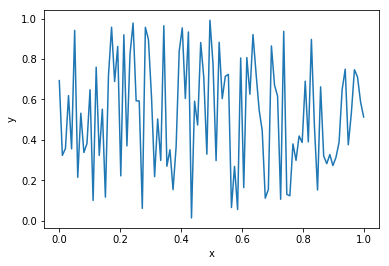

In [41]:
p.plot('x', 'y')

In [42]:
p.data

OrderedDict([('x',
              array([0.        , 0.01010101, 0.02020202, 0.03030303, 0.04040404,
                     0.05050505, 0.06060606, 0.07070707, 0.08080808, 0.09090909,
                     0.1010101 , 0.11111111, 0.12121212, 0.13131313, 0.14141414,
                     0.15151515, 0.16161616, 0.17171717, 0.18181818, 0.19191919,
                     0.2020202 , 0.21212121, 0.22222222, 0.23232323, 0.24242424,
                     0.25252525, 0.26262626, 0.27272727, 0.28282828, 0.29292929,
                     0.3030303 , 0.31313131, 0.32323232, 0.33333333, 0.34343434,
                     0.35353535, 0.36363636, 0.37373737, 0.38383838, 0.39393939,
                     0.4040404 , 0.41414141, 0.42424242, 0.43434343, 0.44444444,
                     0.45454545, 0.46464646, 0.47474747, 0.48484848, 0.49494949,
                     0.50505051, 0.51515152, 0.52525253, 0.53535354, 0.54545455,
                     0.55555556, 0.56565657, 0.57575758, 0.58585859, 0.5959596 ,
         

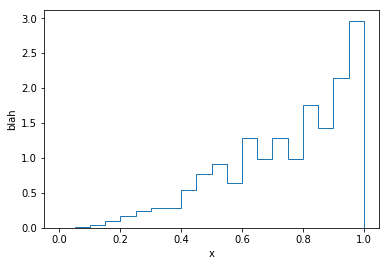

In [43]:
# or again all together
g['blah'] = p.histogram('a')
g.plot('blah')

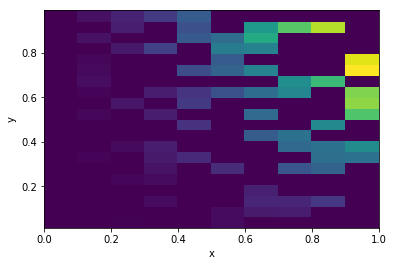

In [45]:
p.binned('a', method='mean')('x', y=20).plot()

In [47]:
p.binned('a', function=lambda x : np.percentile(x,50))('x', y=20)['a']

array([[           nan,            nan,            nan,            nan,
        7.88050165e-04,            nan, 5.79827144e-04, 1.64976892e-03,
                   nan,            nan, 2.65812276e-03,            nan,
        5.68239574e-04, 0.00000000e+00,            nan,            nan,
                   nan,            nan, 2.40180555e-03,            nan],
       [           nan, 1.23371829e-03, 2.67022114e-03,            nan,
                   nan,            nan, 5.56645332e-03,            nan,
                   nan,            nan, 1.10291349e-02,            nan,
        6.61055477e-03, 2.27614589e-02, 1.87651042e-02, 1.11543974e-02,
                   nan, 3.17559902e-02,            nan, 2.82296565e-02],
       [4.51228878e-03,            nan,            nan,            nan,
        9.04305308e-03,            nan,            nan, 1.82683260e-02,
                   nan,            nan,            nan, 3.93336062e-02,
                   nan,            nan,            nan,       

In [48]:
g = pn.GridData('x','y')

In [49]:
g.grid

Grid(
Dimension("x",
points = None,
edges = None)
nbins = 10),
Dimension("y",
points = None,
edges = None)
nbins = 10),)

In [50]:
g['b'] = p.histogram()

In [51]:
g.grid

Grid(
Dimension("x",
points = None,
edges = array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]))
nbins = 10),
Dimension("y",
points = None,
edges = array([0.01349291, 0.11132323, 0.20915355, 0.30698387, 0.40481419,
       0.50264451, 0.60047483, 0.69830515, 0.79613547, 0.89396579,
       0.99179611]))
nbins = 10),)

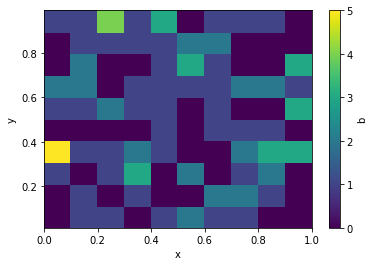

In [52]:
g.plot(cbar=True)

In [53]:
g['x']

array([[0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05],
       [0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15, 0.15],
       [0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25, 0.25],
       [0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35, 0.35],
       [0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45, 0.45],
       [0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55],
       [0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65, 0.65],
       [0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75],
       [0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85, 0.85],
       [0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95]])

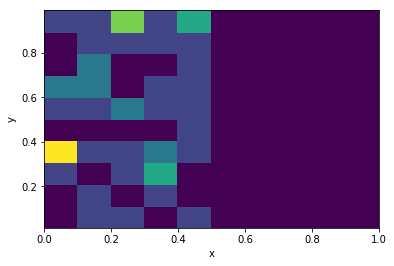

In [54]:
g['c'] = p[p['x'] < 0.5].histogram()
g.plot('c')

In [55]:
grid = pn.grid.Grid(x=[0., 0.5,np.inf], y=10)

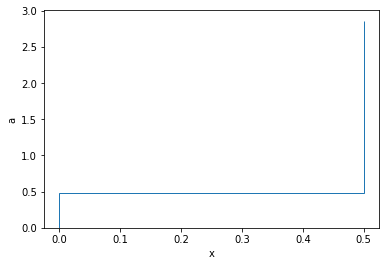

In [57]:
p.binned('a', method='mean')(grid).histogram('a')('x').plot()

In [58]:
p[p['x'] < 1].histogram()

<function pynocular.data.Data.binned.<locals>.fun(*args, **kwargs)>

In [59]:
# let's go a bit crazy....what's f(f(x))?
# it's the same as f(x) here because we already histogrammed

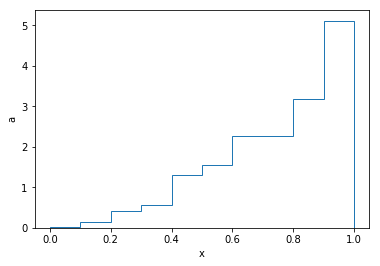

In [60]:
f(f('x')).plot()

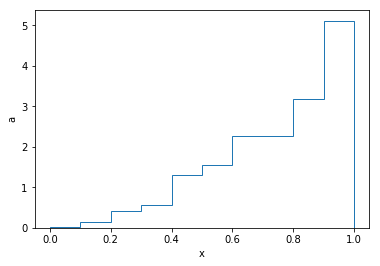

In [61]:
# or first histogram it in x and y and then only x.....again the same
f('x').histogram('a')('x').plot()

In [62]:
p.vars

['x', 'y', 'a']

In [63]:
g = f(x=100)

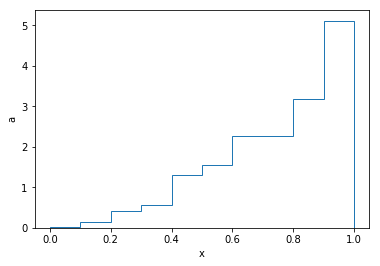

In [64]:
g.plot('a')

In [65]:
g.grid.point_meshgrid

[array([0.005, 0.015, 0.025, 0.035, 0.045, 0.055, 0.065, 0.075, 0.085,
        0.095, 0.105, 0.115, 0.125, 0.135, 0.145, 0.155, 0.165, 0.175,
        0.185, 0.195, 0.205, 0.215, 0.225, 0.235, 0.245, 0.255, 0.265,
        0.275, 0.285, 0.295, 0.305, 0.315, 0.325, 0.335, 0.345, 0.355,
        0.365, 0.375, 0.385, 0.395, 0.405, 0.415, 0.425, 0.435, 0.445,
        0.455, 0.465, 0.475, 0.485, 0.495, 0.505, 0.515, 0.525, 0.535,
        0.545, 0.555, 0.565, 0.575, 0.585, 0.595, 0.605, 0.615, 0.625,
        0.635, 0.645, 0.655, 0.665, 0.675, 0.685, 0.695, 0.705, 0.715,
        0.725, 0.735, 0.745, 0.755, 0.765, 0.775, 0.785, 0.795, 0.805,
        0.815, 0.825, 0.835, 0.845, 0.855, 0.865, 0.875, 0.885, 0.895,
        0.905, 0.915, 0.925, 0.935, 0.945, 0.955, 0.965, 0.975, 0.985,
        0.995])]

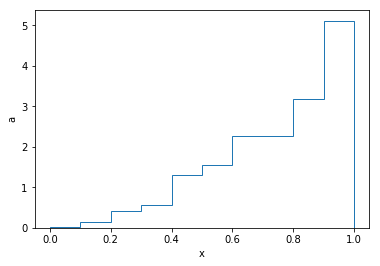

In [66]:
g.interpolate('a', method='cubic')(x=100).plot()

In [67]:
np.concatenate([[1,2,3], [3,4]])

array([1, 2, 3, 3, 4])

In [68]:
a = {'x':2}

In [69]:
a.update({'y':7})

In [70]:
a

{'x': 2, 'y': 7}

In [71]:
from collections import OrderedDict

In [72]:
a = OrderedDict({'x':2})


In [73]:
a

OrderedDict([('x', 2)])

In [74]:
a.update({'y':7})

In [75]:
a

OrderedDict([('x', 2), ('y', 7)])

In [76]:
a.update({'x':23})

In [77]:
a

OrderedDict([('x', 23), ('y', 7)])

In [78]:
a['k'] = a.pop('y')

In [79]:
a

OrderedDict([('x', 23), ('k', 7)])

In [80]:
a = np.arange(24).reshape(4,3,2)

In [81]:
a

array([[[ 0,  1],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [82]:
a.reshape(-1, *a.shape[2:])[0] +=1

In [83]:
a

array([[[ 1,  2],
        [ 2,  3],
        [ 4,  5]],

       [[ 6,  7],
        [ 8,  9],
        [10, 11]],

       [[12, 13],
        [14, 15],
        [16, 17]],

       [[18, 19],
        [20, 21],
        [22, 23]]])

In [84]:
p2['b'] = np.arange(len(p2)*2).reshape(-1,2)

In [85]:
#p2.histogram('b')('x')

In [86]:
list(range(10))[2:]

[2, 3, 4, 5, 6, 7, 8, 9]

In [87]:
isinstance(3., float)

True

In [88]:
g.grid
#

Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ]))
nbins = 100),)

In [89]:
g.resample('a')(x=0.5).grid

Grid(
Dimension("x",
points = None,
edges = array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]))
nbins = 50),)

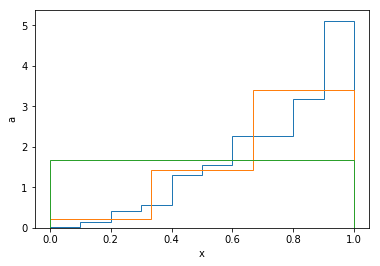

In [90]:
g.resample('a')(x=0.5).plot()
g.resample('a')(x=0.03).plot()
g.resample('a')(x=0.01).plot()

In [78]:
import matplotlib.image as mpimg

img=mpimg.imread('on-fire.jpeg')

img1d = np.average(img, axis=-1)

In [79]:
img1d.shape

(722, 1280)

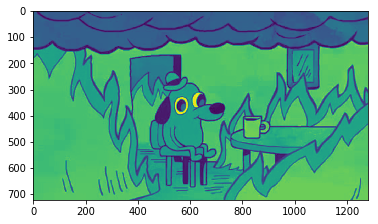

In [80]:
from matplotlib import pyplot as plt
plt.imshow(img1d)

In [130]:
g = pn.GridData()#x=np.arange(1281), y=np.arange(723))

In [134]:
g['img'] = img1d.T[:,::-1]

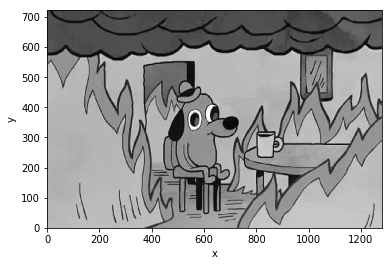

In [136]:
g.plot('img', cmap='gray')

In [84]:
#gs = g.resample('img')(x=0.1, y=0.1)

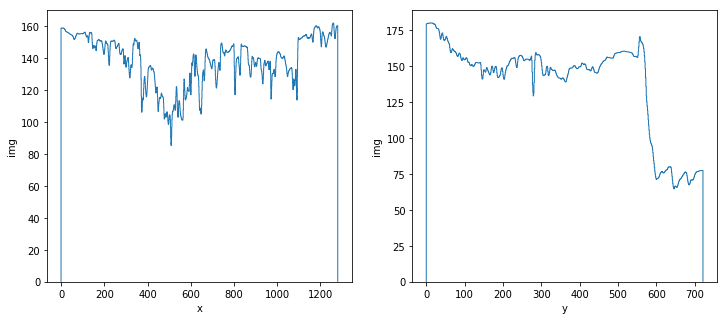

In [85]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
f = g.histogram('img', method='mean')
f('x').plot(ax=ax[0])
f('y').plot(ax=ax[1])

In [120]:
N = 300
pd = pn.PointData(x=np.random.rand(N)*1280, y=np.random.rand(N)*722)

In [121]:
pd['img'] = g.lookup('img')

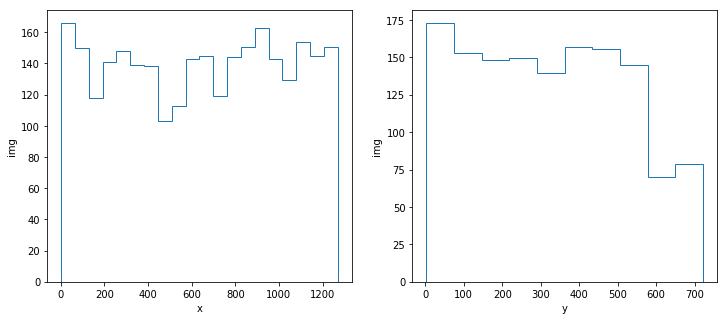

In [142]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
f = pd.histogram('img', method='mean')
f(x=20).plot(ax=ax[0])
f('y').plot(ax=ax[1])

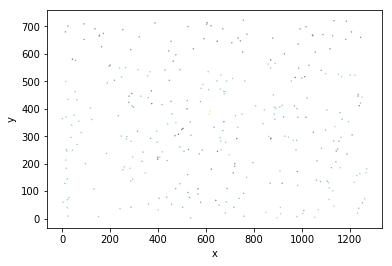

In [122]:
pd.plot_scatter('x', 'y', 'img', s=0.1)

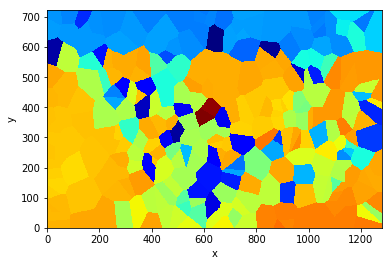

In [125]:
pd.interpolate('img', method='nearest')(g).plot(cmap='jet')

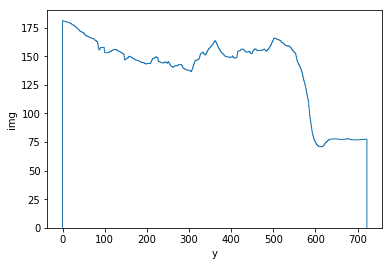

In [129]:
pd.interpolate('img', method='nearest')(g).histogram('img', method='mean')('y').plot()